# Week 12 Assignment

# PART 1 - Pivoting Data for Fun!

In this exercise, we're going to work with data about condemned buildings in St. Louis.  This data set is in `/data/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in the past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [1]:
#Import Packages & Read in Data
%matplotlib inline
import pandas as pd
import numpy as np
import datetime 

condemn = pd.read_csv('/data/condemn.txt')
condemn.shape

/opt/tljh/user/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (2,8,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(32586, 40)

In [2]:
condemn.head()

,AcctNum,PrclErr,AddrAdjusted,CityBlock,Parcel,OwnerCode,Handle,Parcel9,AddrNum,AddrSuf,...,CensBlock00,AsrNbrhd,ImpactCode,NLC,Parity,Inspector,Images,FirstDate,LastDate,UpDateGeo
0,1.0,0.0,False,3652.00,341.0,1.0,1.365200e+10,365200341.0,4049,,...,1114.4006,309.0,0.0,123.0,O,NaN,NaN,1987-08-07 00:00:00,2019-01-04 00:00:00,NaN
1,2.0,0.0,False,666.00,80.0,0.0,1.066600e+10,66600080.0,906,,...,1234.2003,248.0,0.0,104.0,E,NaN,NaN,1988-06-28 00:00:00,2019-01-04 00:00:00,NaN
2,3.0,0.0,False,3913.01,120.0,1.0,1.391301e+10,391301120.0,4218,,...,1191.1004,230.0,0.0,210.0,E,NaN,NaN,1990-08-28 00:00:00,2019-01-04 00:00:00,NaN
3,4.0,2.0,False,3744.00,145.0,0.0,1.374400e+10,374400145.0,4145,,...,1111.4000,231.0,0.0,92.0,O,NaN,NaN,1990-06-12 00:00:00,2019-01-04 00:00:00,NaN
4,5.0,0.0,False,1103.00,30.0,0.0,1.110300e+10,110300030.0,1936,,...,1266.5001,318.0,0.0,5.0,E,NaN,NaN,2006-12-21 00:00:00,2019-01-04 00:00:00,NaN


In [3]:
condemn.columns

Index(['AcctNum', 'PrclErr', 'AddrAdjusted', 'CityBlock', 'Parcel',
       'OwnerCode', 'Handle', 'Parcel9', 'AddrNum', 'AddrSuf', 'StDir',
       'StName', 'StType', 'InspectDate', 'InspectType', 'CondLetterSent',
       'Status', 'OwnerCompany', 'OwnerName', 'OwnerAddr', 'OwnerCity',
       'OwnerState', 'OwnerZIP', 'GeoCityBLockPart', 'Ward00', 'Precinct02',
       'Nbrhd', 'CDADist', 'CDASubDist', 'PoliceDist', 'CensBlock00',
       'AsrNbrhd', 'ImpactCode', 'NLC', 'Parity', 'Inspector', 'Images',
       'FirstDate', 'LastDate', 'UpDateGeo'],
      dtype='object')

In [4]:
condemn['InspectDate']

0        1986-07-10 00:00:00
1        2009-07-23 00:00:00
2        2003-08-06 00:00:00
3        1996-06-17 00:00:00
4        2006-12-20 00:00:00
                ...         
32581    2014-06-24 09:00:00
32582    2013-06-27 23:50:00
32583    2015-02-10 13:53:00
32584    2016-10-18 14:09:00
32585    2013-06-27 23:34:00
Name: InspectDate, Length: 32586, dtype: object

In [5]:
condemn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AcctNum           28985 non-null  float64
 1   PrclErr           28985 non-null  float64
 2   AddrAdjusted      28985 non-null  object 
 3   CityBlock         28985 non-null  float64
 4   Parcel            28985 non-null  float64
 5   OwnerCode         28985 non-null  float64
 6   Handle            32585 non-null  float64
 7   Parcel9           32585 non-null  float64
 8   AddrNum           32585 non-null  object 
 9   AddrSuf           29006 non-null  object 
 10  StDir             28985 non-null  object 
 11  StName            32585 non-null  object 
 12  StType            32503 non-null  object 
 13  InspectDate       32584 non-null  object 
 14  InspectType       32583 non-null  object 
 15  CondLetterSent    32119 non-null  object 
 16  Status            25462 non-null  object

##### Filter down to only the data between 1986 and 2014...

In [6]:
#first, convert the InspectDate field to datetime64 (use the pandas dt.normalize() method to extract the datepart only)
#condemn['InspectDate'] = pd.to_datetime(condemn['InspectDate'])

condemn['InspectDate'] = pd.to_datetime((condemn['InspectDate']), format='%Y-%m-%d').dt.normalize()

print(condemn['InspectDate'])
condemn.iloc[:,0:15] #this will select all rows, but only the first 0-14 columns

0       1986-07-10
1       2009-07-23
2       2003-08-06
3       1996-06-17
4       2006-12-20
           ...    
32581   2014-06-24
32582   2013-06-27
32583   2015-02-10
32584   2016-10-18
32585   2013-06-27
Name: InspectDate, Length: 32586, dtype: datetime64[ns]


,AcctNum,PrclErr,AddrAdjusted,CityBlock,Parcel,OwnerCode,Handle,Parcel9,AddrNum,AddrSuf,StDir,StName,StType,InspectDate,InspectType
0,1.0,0.0,False,3652.00,341.0,1.0,1.365200e+10,365200341.0,4049,,,COTTAGE,AV,1986-07-10,CB
1,2.0,0.0,False,666.00,80.0,0.0,1.066600e+10,66600080.0,906,,,GEYER,AV,2009-07-23,CB
2,3.0,0.0,False,3913.01,120.0,1.0,1.391301e+10,391301120.0,4218,,,MARYLAND,AV,2003-08-06,CD
3,4.0,2.0,False,3744.00,145.0,0.0,1.374400e+10,374400145.0,4145,,,COOK,AV,1996-06-17,CD
4,5.0,0.0,False,1103.00,30.0,0.0,1.110300e+10,110300030.0,1936,,,ST LOUIS,AV,2006-12-20,CD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32581,NaN,NaN,NaN,NaN,NaN,NaN,1.382900e+10,382900560.0,5971,NaN,NaN,MAPLE,AV,2014-06-24,Structural Condemnation
32582,NaN,NaN,NaN,NaN,NaN,NaN,1.303400e+10,303400010.0,7154,NaN,NaN,VERMONT,AV,2013-06-27,Structural Condemnation
32583,NaN,NaN,NaN,NaN,NaN,NaN,1.487200e+10,487200310.0,2740,NaN,NaN,PRAIRIE,AV,2015-02-10,Structural Condemnation
32584,NaN,NaN,NaN,NaN,NaN,NaN,1.376205e+10,376205170.0,782,NaN,NaN,BAYARD,AV,2016-10-18,Structural Condemnation


In [7]:
#next, create date filters
#option 1 (used this one!)
timeframe_filter = condemn['InspectDate'].between('1986-01-01', '2014-12-31', inclusive = True)  
#OR
#option 2
#start_dt = datetime.datetime(1986, 1, 1)
#stop_dt = datetime.datetime(2014, 12, 31)
#timeframe_filter = (condemn['InspectDate'] >= start_dt) & (condemn['InspectDate'] <= stop_dt)

#Notes to Self (dealing with date objects) 
#https://www.w3schools.com/python/python_datetime.asp; #https://www.geeksforgeeks.org/how-to-convert-datetime-to-date-in-pandas/
#https://www.codegrepper.com/code-examples/python/extract+date+from+datetime+pandas

In [8]:
#final data subset
condemnations = condemn.loc[timeframe_filter]
#OR
#condemnations = condemn[timeframe_filter]

In [9]:
#checks
min_dt = condemnations['InspectDate'].min()
max_dt = condemnations['InspectDate'].max()

print(f'Min Date = {min_dt}')
print(f'Max Date = {max_dt}')

print(condemnations.shape)

print(len(condemnations[condemnations['InspectDate'] < '1986']))
print(len(condemnations[condemnations['InspectDate'] >= '2015']))

Min Date = 1986-01-03 00:00:00
Max Date = 2014-12-30 00:00:00
(30232, 40)
0
0


In [10]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [11]:
#some quick checks
condemnations.columns
condemnations['Status'].value_counts()

B    10572
W     9670
L     4966
R       98
Name: Status, dtype: int64

In [12]:
condemnations.head()

,AcctNum,PrclErr,AddrAdjusted,CityBlock,Parcel,OwnerCode,Handle,Parcel9,AddrNum,AddrSuf,...,CensBlock00,AsrNbrhd,ImpactCode,NLC,Parity,Inspector,Images,FirstDate,LastDate,UpDateGeo
0,1.0,0.0,False,3652.00,341.0,1.0,1.365200e+10,365200341.0,4049,,...,1114.4006,309.0,0.0,123.0,O,NaN,NaN,1987-08-07 00:00:00,2019-01-04 00:00:00,NaN
1,2.0,0.0,False,666.00,80.0,0.0,1.066600e+10,66600080.0,906,,...,1234.2003,248.0,0.0,104.0,E,NaN,NaN,1988-06-28 00:00:00,2019-01-04 00:00:00,NaN
2,3.0,0.0,False,3913.01,120.0,1.0,1.391301e+10,391301120.0,4218,,...,1191.1004,230.0,0.0,210.0,E,NaN,NaN,1990-08-28 00:00:00,2019-01-04 00:00:00,NaN
3,4.0,2.0,False,3744.00,145.0,0.0,1.374400e+10,374400145.0,4145,,...,1111.4000,231.0,0.0,92.0,O,NaN,NaN,1990-06-12 00:00:00,2019-01-04 00:00:00,NaN
4,5.0,0.0,False,1103.00,30.0,0.0,1.110300e+10,110300030.0,1936,,...,1266.5001,318.0,0.0,5.0,E,NaN,NaN,2006-12-21 00:00:00,2019-01-04 00:00:00,NaN


In [13]:
#first, create a year column from condemnations['InspectDate']
condemnations['InspectYear'] = pd.to_datetime(condemnations['InspectDate']).dt.year
#condemnations['InspectYear'] 

#next, the pivot table
by_year = condemnations.pivot_table(
    values='AcctNum', 
    index='InspectYear', 
    columns='Status', 
    aggfunc=np.ma.count, 
    fill_value=0)
by_year

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Status,B,L,R,W
InspectYear,,,,
1986,22,12,19,112
1987,91,20,8,361
1988,215,16,15,297
1989,277,15,11,432
1990,119,29,8,322
1991,139,18,4,351
1992,204,30,4,258
1993,185,47,2,193
1994,208,94,5,293


In [14]:
#quick checks
print(by_year.shape)
print(list(by_year.columns))
print(list(by_year.sum()))

(29, 4)
['B', 'L', 'R', 'W']
[10572, 4966, 98, 9670]


In [15]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in a way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Text(0.5, 1.0, 'Fig1a: Building Condemnations by Year')

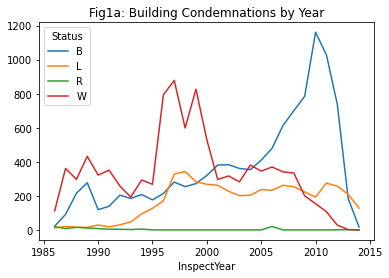

In [17]:
%matplotlib inline
by_year.plot()
plt.title('Fig1a: Building Condemnations by Year')

---

In [18]:
#first, Some Assumptions about the codes...
    #B => Business
    #L => Land
    #R => Residential 
    #W => Warehouse

Text(0.5, 1.0, 'Fig1b: Building Condemnations by Year')

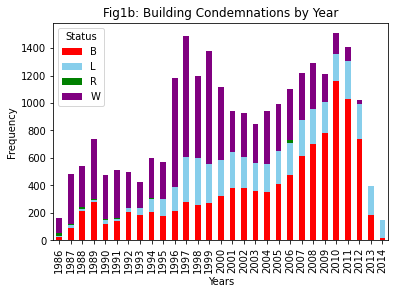

In [19]:
#stacked bars
# create stacked bar chart for monthly temperatures
by_year.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green', 'purple'])

# labels for x & y axis
plt.xlabel('Years')
plt.ylabel('Frequency')
 
# title of plot
plt.title('Fig1b: Building Condemnations by Year')

#https://www.geeksforgeeks.org/how-to-create-a-stacked-bar-plot-in-seaborn/

Text(0.5, 1.0, 'Fig1c: Status of Building Condemnations by Year')

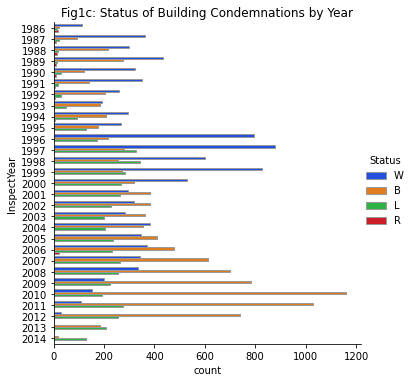

In [20]:
#Plot of the original data (1986-2014)
sns.catplot(y="InspectYear", hue="Status", kind="count",
            palette="bright", edgecolor=".6",
            data=condemnations)
# title of plot
plt.title('Fig1c: Status of Building Condemnations by Year')


Comments:
It appears the number of condemned business buildings increased dramatically between 2005 & 2013, relative to the prior years (peaking at about 1,200 in 2010), while others were on the decline (Figs 1a,b & c).
All types of building condemnations were on the rise between 1995 & 1998 with the exception of Residential buildings which seemed to remain flat between 1986 and 2014 (a slight bump though); it's very likely that the scale of the graph is distorting the slight peak shown in the residential line plot around 2006 (see Fig1d below). 

It's hard to tell what was driving these numbers/peak periods in the local environment. Nonetheless, these dates seem to coincide with economic shocks like the stock market/dot.com bubble between 1995 & 2000 as well as the housing/foreclosure bubble between 2006 and 2012.

Text(0.5, 1.0, 'Fig1d: Density Plot of Residential Building Condemnations')

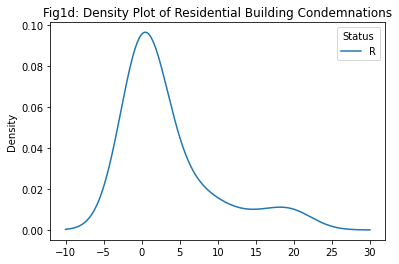

In [21]:
#univariate Density plot of R (Residential)
graph = by_year[['R']].plot.kde()
plt.title('Fig1d: Density Plot of Residential Building Condemnations')

Comments: The bump/uptick in Residential condemnations around 2005 (year 20 on the x-axis) is more evident in Fig 1b above.

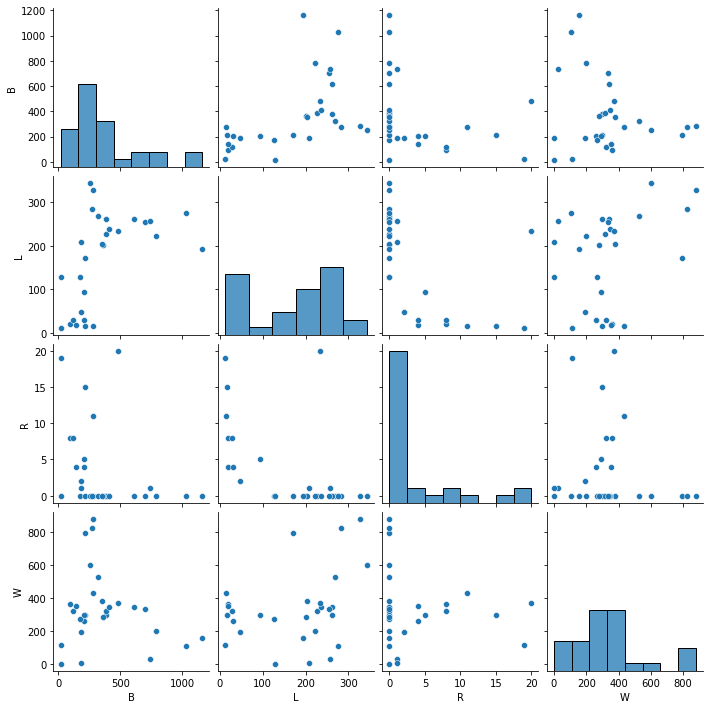

In [22]:
#Pair Plot (Pairwise Relationships)
sns.pairplot(by_year)
#plt.title('Fig2a: Pairwise Relationships of Categories of Building Condemnations')

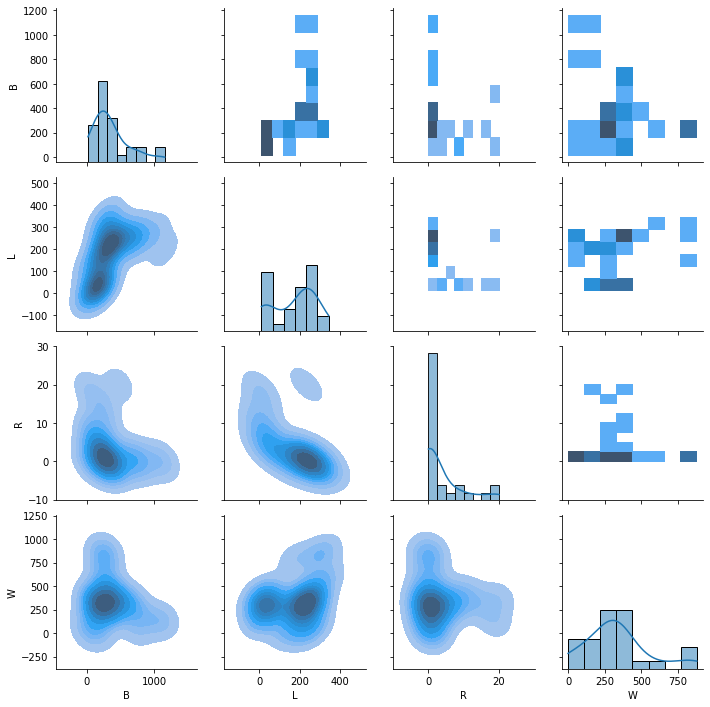

In [23]:
#plot several univariate distributions
g = sns.PairGrid(by_year)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
#plt.title('Fig2b: Pairwise Relationships of Categories of Building Condemnations')

Comments: The pairwise graphs in Figs 2a & b indicate that the categories seem to have non-linear relationships, looking at the line plots (Fig2a) and contour plots (Fig2b).  

# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage changed during the beginning of COVID-19.  This real data.  Please don't judge anyone based on the information here.  ;)  The data is in the `/data/meetings.csv` file.

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [24]:
#Import Packages & Read in Data
import pandas as pd
import numpy as np
from datetime import datetime

meetings = pd.read_csv('/data/meetings.csv')
meetings.head()

,meeting_uuid,meetingTitle,meetingId,userName,user_id,user_tags,endTime,startTime,email,participantSeconds,...,meetingDurationMinutes,popId,userType,billable,moderatorLess,start_time,total_highlights_created,smart_meeting,transcription_used,total_transcription_duration_minutes
0,418897-3b9f0feb-f8f4-4ae7-9464-eb983c30af60,Review Payer Websites,681568231,chris.rogers.amitechsolutions,3180644,NaN,2020-03-31 22:21:35,2020-03-31 21:00:22,chris.rogers@amitechsolutions.com,19386,...,81.2167,26,ENTERPRISE_PAID,True,True,2020-03-31 21:00:22.0,NaN,NaN,NaN,NaN
1,418897-14587f14-faf0-4879-9756-fe335357b413,Drew's Meeting,258719784,Drew.Marco,2717893,NaN,2020-03-31 21:30:37,2020-03-31 20:58:41,Drew.Marco@AmitechSolutions.com,7242,...,31.9333,25,ENTERPRISE_PAID,True,True,2020-03-31 20:58:41.0,NaN,NaN,NaN,NaN
2,418897-aa82b3f0-e3df-456a-80d5-daef7902c232,St. Luke's Project Discussion,415828450,eric.keeney,2692908,NaN,2020-03-31 22:48:43,2020-03-31 20:57:51,eric.keeney@amitechsolutions.com,38469,...,110.8667,25,ENTERPRISE_PAID,True,True,2020-03-31 20:57:51.0,NaN,NaN,NaN,NaN
3,418867-f5fadea7-75f8-4860-9a1e-090805ff6346,Amit's Meeting,275007771,amit.bhagat,2756615,NaN,2020-03-31 21:02:28,2020-03-31 20:34:43,amit.bhagat@amitechsolutions.com,6394,...,27.7500,110,ENTERPRISE_PAID,True,True,2020-03-31 20:34:43.0,NaN,NaN,NaN,NaN
4,418894-3a911019-1a97-4058-8bd4-035245c73bda,Andrea's Meeting,791412043,andrea.bryant.amitechsolutions,2673353,NaN,2020-03-31 20:49:46,2020-03-31 20:30:02,hr-dept@amitechsolutions.com,3363,...,19.7333,25,ENTERPRISE_PAID,True,True,2020-03-31 20:30:02.0,NaN,NaN,NaN,NaN


In [25]:
#quick checks
print(meetings.columns)
print('----------')
print(meetings.shape)
print('----------')
print(meetings.info())

Index(['meeting_uuid', 'meetingTitle', 'meetingId', 'userName', 'user_id',
       'user_tags', 'endTime', 'startTime', 'email', 'participantSeconds',
       'joinDate', 'joinWeek', 'joinMonth', 'participants',
       'participantMinutes', 'meetingDurationMinutes', 'popId', 'userType',
       'billable', 'moderatorLess', 'start_time', 'total_highlights_created',
       'smart_meeting', 'transcription_used',
       'total_transcription_duration_minutes'],
      dtype='object')
----------
(1188, 25)
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   meeting_uuid                          1188 non-null   object 
 1   meetingTitle                          1169 non-null   object 
 2   meetingId                             1188 non-null   int64  
 3   userName                              11

##### Data Filtering (select data for before & during COVID usage)

In [26]:
#Create New Date Field

"""
1. Create a new column called startDate that contains just the day part of the startTime column in the data. 
You can do that using datetime functions if you want, but you'll notice that the date in this file is a 
string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters 
of the string instead. meetings['startTime'].str[0:10]
"""

#Create new date column (that contains just the day part of the startTime column) 
#option1 (string slicing)
#meetings['startDate'] = meetings['startTime'].str[0:10]

#option2 (pandas to_datetime)... used this one!
meetings['startDate'] = pd.to_datetime(meetings['startTime']).dt.date

#Convert the new date field to datetime64
meetings['startDate'] = pd.to_datetime(meetings['startDate'], format='%Y-%m-%d')
#print(meetings.dtypes)

#check new column
meetings['startDate']
meetings.head()


,meeting_uuid,meetingTitle,meetingId,userName,user_id,user_tags,endTime,startTime,email,participantSeconds,...,popId,userType,billable,moderatorLess,start_time,total_highlights_created,smart_meeting,transcription_used,total_transcription_duration_minutes,startDate
0,418897-3b9f0feb-f8f4-4ae7-9464-eb983c30af60,Review Payer Websites,681568231,chris.rogers.amitechsolutions,3180644,NaN,2020-03-31 22:21:35,2020-03-31 21:00:22,chris.rogers@amitechsolutions.com,19386,...,26,ENTERPRISE_PAID,True,True,2020-03-31 21:00:22.0,NaN,NaN,NaN,NaN,2020-03-31
1,418897-14587f14-faf0-4879-9756-fe335357b413,Drew's Meeting,258719784,Drew.Marco,2717893,NaN,2020-03-31 21:30:37,2020-03-31 20:58:41,Drew.Marco@AmitechSolutions.com,7242,...,25,ENTERPRISE_PAID,True,True,2020-03-31 20:58:41.0,NaN,NaN,NaN,NaN,2020-03-31
2,418897-aa82b3f0-e3df-456a-80d5-daef7902c232,St. Luke's Project Discussion,415828450,eric.keeney,2692908,NaN,2020-03-31 22:48:43,2020-03-31 20:57:51,eric.keeney@amitechsolutions.com,38469,...,25,ENTERPRISE_PAID,True,True,2020-03-31 20:57:51.0,NaN,NaN,NaN,NaN,2020-03-31
3,418867-f5fadea7-75f8-4860-9a1e-090805ff6346,Amit's Meeting,275007771,amit.bhagat,2756615,NaN,2020-03-31 21:02:28,2020-03-31 20:34:43,amit.bhagat@amitechsolutions.com,6394,...,110,ENTERPRISE_PAID,True,True,2020-03-31 20:34:43.0,NaN,NaN,NaN,NaN,2020-03-31
4,418894-3a911019-1a97-4058-8bd4-035245c73bda,Andrea's Meeting,791412043,andrea.bryant.amitechsolutions,2673353,NaN,2020-03-31 20:49:46,2020-03-31 20:30:02,hr-dept@amitechsolutions.com,3363,...,25,ENTERPRISE_PAID,True,True,2020-03-31 20:30:02.0,NaN,NaN,NaN,NaN,2020-03-31


In [27]:
#Create Filters

"""
2. Create another new column. 
This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27. 
A hand tip on this is that you can set values for some rows in a data frame using 
meetings.loc[row_filter,'Column Name'] = 'Value' if you've created a row_filter as we discussed in prior weeks.
"""
#Create the date filter for "BEFORE" & "DURING"... 
#option 1
#filtered_df_pre = meetings.loc[(meetings['startDate'] >= '2020-02-17') & (meetings['startDate'] < '2020-02-28')]
#filtered_df_pre

#filtered_df_pst = meetings.loc[(meetings['startDate'] >= '2020-03-16') & (meetings['startDate'] < '2020-03-27')]
#filtered_df_pst

#option 2 (used this option)
pre_dates_filter = meetings["startDate"].between('2020-02-17', '2020-02-28', inclusive = True)  
pre_dates_filter

pst_dates_filter = meetings["startDate"].between('2020-03-16', '2020-03-27', inclusive = True)  
pst_dates_filter

#Create new column (timeFlag)
#(Option1: pandas IF condition)
#general structure: df.loc[df['column name'] condition, 'new column name'] = 'value if condition is met'
meetings.loc[meetings["startDate"].between('2020-02-17', '2020-02-28', inclusive = True), 'timeFlag'] = 'BEFORE' 
meetings.loc[meetings["startDate"].between('2020-03-16', '2020-03-27', inclusive = True), 'timeFlag'] = 'AFTER'

#(Option2: using filters)
#alternate
meetings.loc[pre_dates_filter,'timeFlag'] = 'Before'
meetings.loc[pst_dates_filter,'timeFlag'] = 'During'

#check new column
meetings.info()
meetings.head()

print('-----------------')
print(meetings['timeFlag'].unique())
print(meetings['timeFlag'].value_counts())
#some NaNs in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   meeting_uuid                          1188 non-null   object        
 1   meetingTitle                          1169 non-null   object        
 2   meetingId                             1188 non-null   int64         
 3   userName                              1188 non-null   object        
 4   user_id                               1188 non-null   int64         
 5   user_tags                             0 non-null      float64       
 6   endTime                               1188 non-null   object        
 7   startTime                             1188 non-null   object        
 8   email                                 1188 non-null   object        
 9   participantSeconds                    1188 non-null   int64         
 10  

##### Data Summarization (Pivot)

In [28]:
#Compare video conference (VC) usage data for the last two weeks of February vs. the last two weeks of March

"""
3. From here, using pivot_table() is one good way to summarize the information.
"""

#first, subset data to include just the befores & afters
options = ['BEFORE','AFTER']

df_subset = meetings.loc[meetings['timeFlag'].isin(options)] 

print(df_subset.shape)
df_subset.head()

#next, pivot the data (VC usage) & aggreagate the frequencies
summary = meetings.pivot_table(
    values='user_id', 
    index='userName', 
    columns='timeFlag', 
    aggfunc=np.ma.count, 
    fill_value=0)

#flip the column ordering (using reindex)
column_order = ['Before','During']
summary = summary.reindex(column_order, axis=1)

#compute percentage change in new column
summary["pctChange"] = (summary["During"] - summary["Before"]) / summary["Before"]

#summary.head()
summary

(0, 27)


timeFlag,Before,During,pctChange
userName,,,
Drew.Marco,12,19,0.583333
amit.bhagat,17,30,0.764706
andrea.bryant.amitechsolutions,5,3,-0.400000
angie.warren,5,9,0.800000
chris.rogers.amitechsolutions,4,3,-0.250000
eric.keeney,15,27,0.800000
eric.rodman,4,12,2.000000
jeff.hatfield.amitechsolutions,13,26,1.000000
jennifer.patton.amitechs,5,7,0.400000


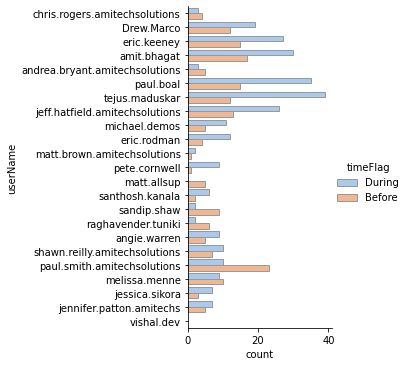

In [29]:
#Plot of the original data (pre-post)
sns.catplot(y="userName", hue="timeFlag", kind="count",
            palette="pastel", edgecolor=".6",
            data=meetings)

Comment: VC usage increased substantially in the last two weeks of March compared to the last two weeks of February for the majority (~60%) of folks. One Mr. Paul Boal (no judgement...) had the second highest usage in the last 2 weeks of March.

In [30]:
#quick checks
print('Summary Table Length')
print(len(summary))
print()
print('Average % Change (Pre vs. Post)')
print(summary['pctChange'].mean().round(2))

Summary Table Length
22

Average % Change (Pre vs. Post)
0.92


---

In [31]:
assert(len(summary) == 22)

In [32]:
assert(summary['pctChange'].mean().round(2) == 0.92)



---



## Submitting Your Work

In order to submit your work, you'll need to use the `git` command line program to **add** your homework file (this file) to your local repository, **commit** your changes to your local repository, and then **push** those changes up to github.com.  From there, I'll be able to **pull** the changes down and do my grading.  I'll provide some feedback, **commit** and **push** my comments back to you.  Next week, I'll show you how to **pull** down my comments.

To run through everything one last time and submit your work:
1. Use the `Kernel` -> `Restart Kernel and Run All Cells` menu option to run everything from top to bottom and stop here.
2. Follow the instruction on the prompt below to either ssave and submit your work, or continue working.

If anything fails along the way with this submission part of the process, let me know.  I'll help you troubleshoort.

---

In [33]:
a=input('''
Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

''')

if a=='yes':
    !git add week12_assignment_2.ipynb
    !git commit -a -m "Submitting the week 12 programming assignment"
    !git push
else:
    print('''
    
OK. We can wait.
''')


Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

 yes


[main 2b620e5] Submitting the week 12 programming assignment
 2 files changed, 2911 insertions(+), 2 deletions(-)
 create mode 100644 week12/week12_assignment_2.ipynb
Counting objects: 5, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 174.67 KiB | 9.70 MiB/s, done.
Total 5 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
remote: This repository moved. Please use the new location:
remote:   git@github.com:AI2Z/hds5210-2022.git
To github.com:ai2z/hds5210-2022.git
   5448253..2b620e5  main -> main
